In [1]:
pip install facenet-pytorch matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



🧠 Prediction Results:
Arif2.jpg: Predicted ID = 001, Name = ARIFUL MALLICK
Atanu1.jpg: Predicted ID = 002, Name = ATANU MANNA
Nandana.jpg: Predicted ID = 007, Name = NANDANA MUKHERJEE
Sankar2.jpg: Predicted ID = 003, Name = SANKAR RAJAK
Shadan1.jpg: Predicted ID = 004, Name = SHADAN ALAM
Surajit1.jpg: Predicted ID = 005, Name = SURAJIT MISHRA
Swagata.jpg: Predicted ID = 006, Name = SWAGATA NANDA


C:\Users\ce\AppData\Local\Temp\ipykernel_5708\521682454.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_names))


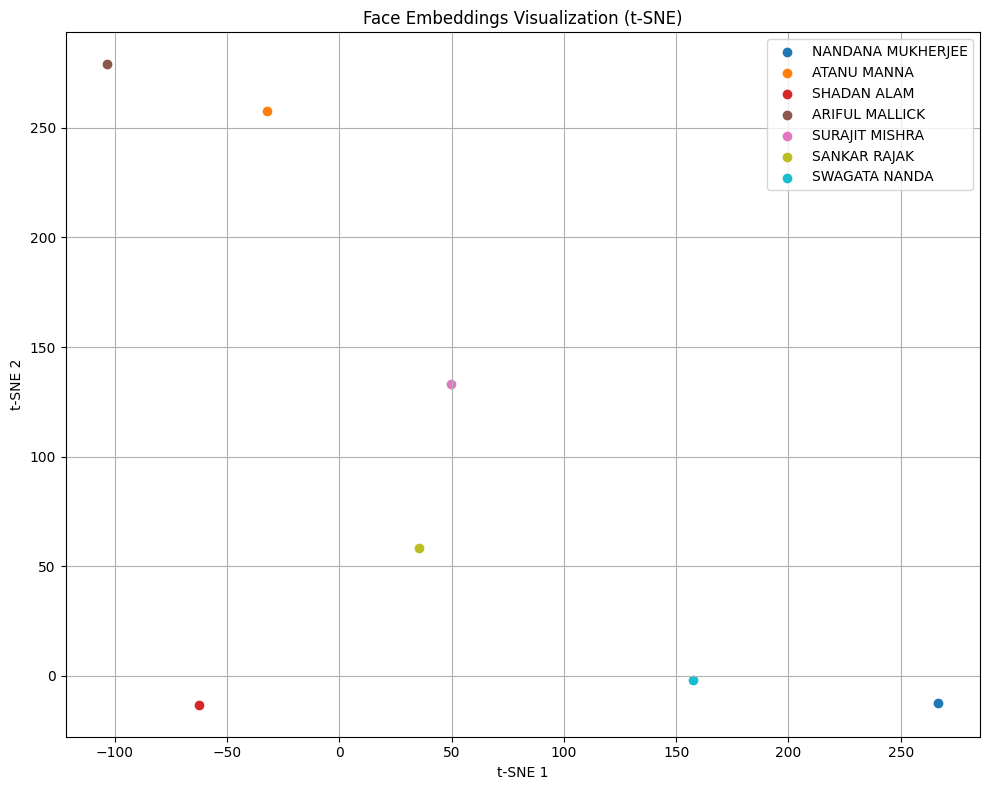

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE
import joblib
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1

# ------------------------------
# Load models
# ------------------------------
mtcnn = MTCNN(image_size=160, margin=20)
facenet = InceptionResnetV1(pretrained='vggface2').eval()
rf_model = joblib.load(r"D:\Attendance\face_rf_model.pkl")
label_encoder = joblib.load(r"D:\Attendance\label_encoder.pkl")

# ------------------------------
# Mapping of predicted ID to actual name
# ------------------------------
name_mapping = {
    "001": "ARIFUL MALLICK",
    "002": "ATANU MANNA",
    "003": "SANKAR RAJAK",
    "004": "SHADAN ALAM",
    "005": "SURAJIT MISHRA",
    "006": "SWAGATA NANDA",
    "007": "NANDANA MUKHERJEE"
}

# ------------------------------
# Load images from testimage folder
# ------------------------------
test_dir = r"D:\Attendance\test image"
embeddings = []
predicted_names = []
image_paths = []

for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    try:
        image = Image.open(img_path).convert("RGB")
        face = mtcnn(image)

        if face is None:
            print(f"❌ No face detected in: {img_file}")
            continue

        with torch.no_grad():
            embedding = facenet(face.unsqueeze(0)).numpy()
            embeddings.append(embedding[0])
            image_paths.append(img_file)

    except Exception as e:
        print(f"⚠️ Error processing {img_file}: {e}")

# ------------------------------
# Check if any embeddings were collected
# ------------------------------
if not embeddings:
    raise ValueError("No valid face embeddings extracted. Please check your images.")

# ------------------------------
# Predict using trained RandomForest model
# ------------------------------
embeddings = np.array(embeddings)
preds = rf_model.predict(embeddings)
predicted_ids = label_encoder.inverse_transform(preds)
predicted_names = [name_mapping.get(code, "Unknown") for code in predicted_ids]

# ------------------------------
# Print Predictions
# ------------------------------
print("\n🧠 Prediction Results:")
for img, pred_id, name in zip(image_paths, predicted_ids, predicted_names):
    print(f"{img}: Predicted ID = {pred_id}, Name = {name}")

# ------------------------------
# Plot 2D t-SNE visualization
# ------------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=2)

embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
unique_names = list(set(predicted_names))
colors = plt.cm.get_cmap("tab10", len(unique_names))

for idx, name in enumerate(unique_names):
    indices = [i for i, n in enumerate(predicted_names) if n == name]
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=name, color=colors(idx))

plt.title("Face Embeddings Visualization (t-SNE)")
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\ce\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model Accuracy on test set: 100.00%


C:\Users\ce\AppData\Local\Temp\ipykernel_18404\94112848.py:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_classes))


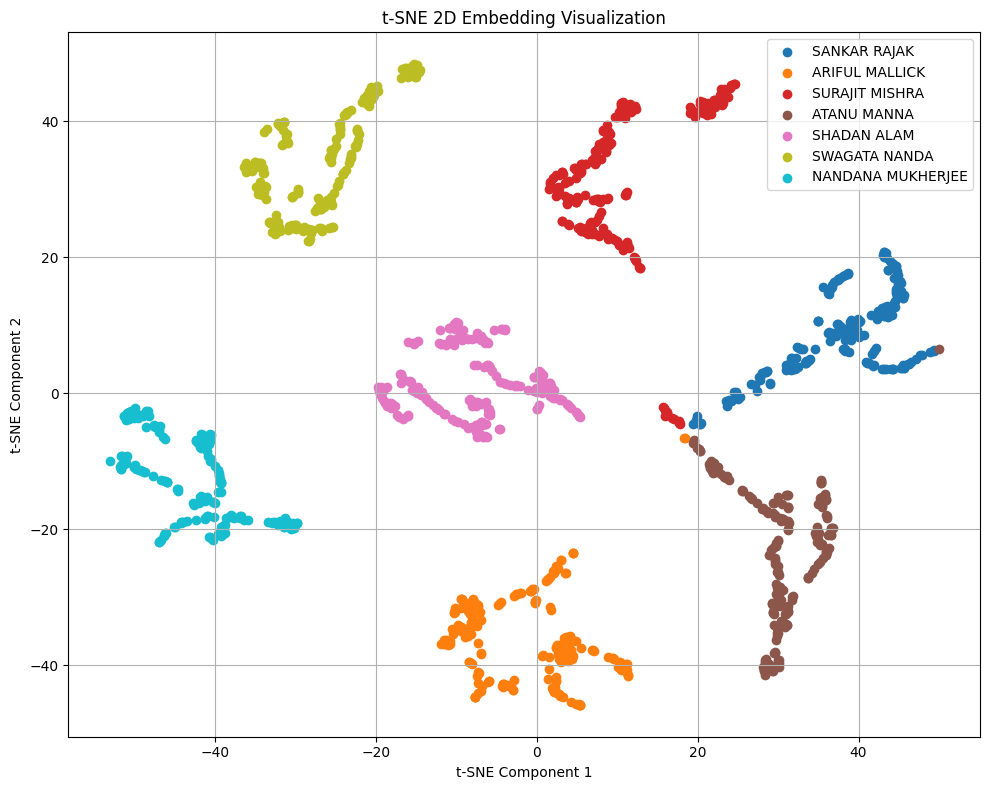

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import joblib
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1

# ------------------------------
# Load the pre-trained components
# ------------------------------
mtcnn = MTCNN(image_size=160, margin=20)
facenet = InceptionResnetV1(pretrained='vggface2').eval()

rf_model = joblib.load(r"D:\Attendance\face_rf_model.pkl")
label_encoder = joblib.load(r"D:\Attendance\label_encoder.pkl")

# ------------------------------
# Setup for your test dataset
# ------------------------------
test_dir = r"D:\Attendance\test image"  # Change this path
labels = []
embeddings = []
true_names = []

# Mapping from label to name (adjust based on your data)
name_mapping = {
    "001": "ARIFUL MALLICK",
    "002": "ATANU MANNA",
    "003": "SANKAR RAJAK",
    "004": "SHADAN ALAM",
    "005": "SURAJIT MISHRA",
    "006": "SWAGATA NANDA",
    "007": "NANDANA MUKHERJEE"
}

# ------------------------------
# Extract embeddings from test images
# ------------------------------
for label_folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, label_folder)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            image = Image.open(img_path).convert("RGB")
            face = mtcnn(image)
            if face is not None:
                with torch.no_grad():
                    embedding = facenet(face.unsqueeze(0)).numpy()
                    embeddings.append(embedding[0])
                    labels.append(label_folder)
                    true_names.append(name_mapping.get(label_folder, label_folder))
        except Exception as e:
            print(f"Skipping {img_path}: {e}")

embeddings = np.array(embeddings)
labels = np.array(labels)

# ------------------------------
# Predict and Print Accuracy (optional)
# ------------------------------
preds = rf_model.predict(embeddings)
decoded_preds = label_encoder.inverse_transform(preds)

accuracy = np.mean(decoded_preds == labels)
print(f"Model Accuracy on test set: {accuracy*100:.2f}%")

# ------------------------------
# 2D Visualization using t-SNE
# ------------------------------
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 8))
unique_classes = list(set(true_names))
colors = plt.cm.get_cmap("tab10", len(unique_classes))

for idx, name in enumerate(unique_classes):
    indices = [i for i, n in enumerate(true_names) if n == name]
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=name, color=colors(idx))

plt.title("t-SNE 2D Embedding Visualization")
plt.legend()
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Model Accuracy on test set: 100.00%


C:\Users\ce\AppData\Local\Temp\ipykernel_18404\298730155.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_classes))


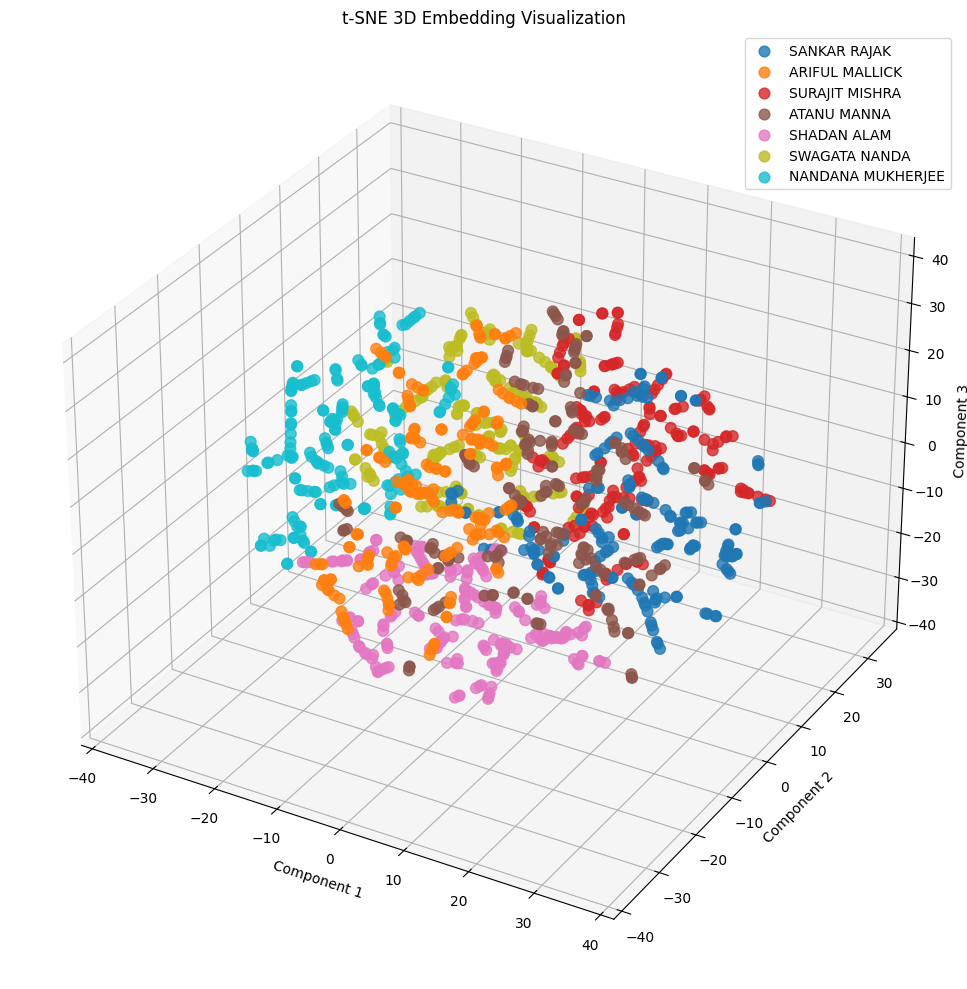

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from PIL import Image
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import joblib
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1

# ------------------------------
# Load the pre-trained components
# ------------------------------
mtcnn = MTCNN(image_size=160, margin=20)
facenet = InceptionResnetV1(pretrained='vggface2').eval()

rf_model = joblib.load(r"D:\Attendance\face_rf_model.pkl")
label_encoder = joblib.load(r"D:\Attendance\label_encoder.pkl")

# ------------------------------
# Setup for your test dataset
# ------------------------------
test_dir = r"D:\Attendance\test image"
labels = []
embeddings = []
true_names = []

# Mapping from label to name
name_mapping = {
    "001": "ARIFUL MALLICK",
    "002": "ATANU MANNA",
    "003": "SANKAR RAJAK",
    "004": "SHADAN ALAM",
    "005": "SURAJIT MISHRA",
    "006": "SWAGATA NANDA",
    "007": "NANDANA MUKHERJEE"
}

# ------------------------------
# Extract embeddings from test images
# ------------------------------
for label_folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, label_folder)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            image = Image.open(img_path).convert("RGB")
            face = mtcnn(image)
            if face is not None:
                with torch.no_grad():
                    embedding = facenet(face.unsqueeze(0)).numpy()
                    embeddings.append(embedding[0])
                    labels.append(label_folder)
                    true_names.append(name_mapping.get(label_folder, label_folder))
        except Exception as e:
            print(f"Skipping {img_path}: {e}")

embeddings = np.array(embeddings)
labels = np.array(labels)

# ------------------------------
# Predict and Accuracy (optional)
# ------------------------------
preds = rf_model.predict(embeddings)
decoded_preds = label_encoder.inverse_transform(preds)

accuracy = np.mean(decoded_preds == labels)
print(f"Model Accuracy on test set: {accuracy*100:.2f}%")

# ------------------------------
# 3D Visualization using t-SNE
# ------------------------------
tsne = TSNE(n_components=3, random_state=42, perplexity=2)  # Use low perplexity if samples are low
embeddings_3d = tsne.fit_transform(embeddings)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

unique_classes = list(set(true_names))
colors = plt.cm.get_cmap("tab10", len(unique_classes))

for idx, name in enumerate(unique_classes):
    indices = [i for i, n in enumerate(true_names) if n == name]
    ax.scatter(embeddings_3d[indices, 0],
               embeddings_3d[indices, 1],
               embeddings_3d[indices, 2],
               label=name, s=60, alpha=0.8, color=colors(idx))

ax.set_title("t-SNE 3D Embedding Visualization")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.legend()
plt.tight_layout()
plt.show()
